In [4]:
!wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.

!tar -xf v1.0-mini.tgz -C ./data/sets/nuscenes  # Uncompress the nuScenes mini split.

!pip install nuscenes-devkit &> /dev/null  # Install nuScenes.

In [1]:
from nuscenes.nuscenes import NuScenes
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.patches as patches

In [2]:
nusc = NuScenes(version='v1.0-mini', dataroot='./data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.344 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


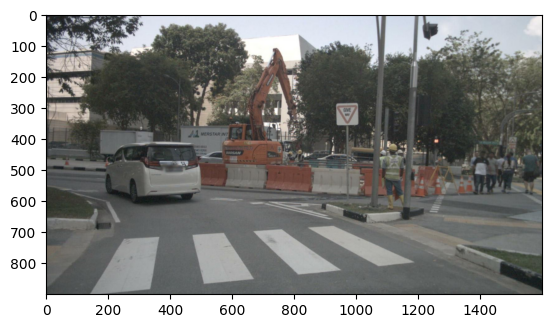

In [4]:
# Encontrar um exemplo de dados
my_sample = nusc.sample[15]

my_sample['data']

# Caminho para a imagem da câmera frontal
cam_front_data = nusc.get('sample_data', my_sample['data']['CAM_FRONT'])
cam_front_image = os.path.join(nusc.dataroot, cam_front_data['filename'])

# Carregar e exibir a imagem
img = cv2.imread(cam_front_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converter de BGR para RGB
plt.imshow(img)
plt.show()

# nusc.render_sample_data(cam_front_data['token']) # Mostrando o "gabarito"

Os blocos seguintes usei para explorar e entender como os dados estão organizados

In [5]:
# Criar um dicionário para mapear category_token para category_name
category_names = {cat['token']: cat['name'] for cat in nusc.category}

# print formatado com as categorias
for cat_token, cat_name in category_names.items():
    print(f'{cat_token} -> {cat_name}')

# Filtrar todas as instâncias que são de 'human.pedestrian.adult'
pedestrian_instances = []
for inst in nusc.instance:
    if category_names[inst['category_token']] == 'human.pedestrian.adult':
        pedestrian_instances.append(inst)


1fa93b757fc74fb197cdd60001ad8abf -> human.pedestrian.adult
b1c6de4c57f14a5383d9f963fbdcb5cb -> human.pedestrian.child
b2d7c6c701254928a9e4d6aac9446d79 -> human.pedestrian.wheelchair
6a5888777ca14867a8aee3fe539b56c4 -> human.pedestrian.stroller
403fede16c88426885dd73366f16c34a -> human.pedestrian.personal_mobility
bb867e2064014279863c71a29b1eb381 -> human.pedestrian.police_officer
909f1237d34a49d6bdd27c2fe4581d79 -> human.pedestrian.construction_worker
63a94dfa99bb47529567cd90d3b58384 -> animal
fd69059b62a3469fbaef25340c0eab7f -> vehicle.car
dfd26f200ade4d24b540184e16050022 -> vehicle.motorcycle
fc95c87b806f48f8a1faea2dcc2222a4 -> vehicle.bicycle
003edbfb9ca849ee8a7496e9af3025d4 -> vehicle.bus.bendy
fedb11688db84088883945752e480c2c -> vehicle.bus.rigid
6021b5187b924d64be64a702e5570edf -> vehicle.truck
5b3cd6f2bca64b83aa3d0008df87d0e4 -> vehicle.construction
732cce86872640628788ff1bb81006d4 -> vehicle.emergency.ambulance
7b2ff083a64e4d53809ae5d9be563504 -> vehicle.emergency.police
90d0f6

In [6]:
#funcao que recebe um token de uma instancia de camera e printa a imagem
def show_img(token):
    data = nusc.get('sample_data', token)
    img = cv2.imread(os.path.join(nusc.dataroot, data['filename']))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [7]:
# Escolher uma cena
my_scene = nusc.scene[0]
print("scene: ", my_scene)

# Obter todas as amostras da cena
first_frame_token = my_scene['first_sample_token'] #atributo com primeiro frame da cena
scene_sample = nusc.get('sample', first_frame_token) #busca na tabela samples a amostra da cena (primeira)
print("sample: ", scene_sample)
print("anns", scene_sample['anns'])


# obter dados da amostra
scene_data = scene_sample['data']
print("scene_data: ", scene_data)


# Obter dados da câmera frontal
camera_sample_data = nusc.get('sample_data', scene_data['CAM_FRONT'])
print("scene_sample_data: ", camera_sample_data)

# Obter dados do sensor da câmera frontal
sensor = nusc.get('calibrated_sensor', camera_sample_data['calibrated_sensor_token'])
print("calibrated_sensor: ", sensor)

# obter a sample_notation
sample_annotation = nusc.get('sample_annotation', scene_sample['anns'][0])
print("sample_annotation: ", sample_annotation)
print(sample_annotation['attribute_tokens'][0])


# obter o primeiro atributo da anotação
attribute = nusc.get('attribute', sample_annotation['attribute_tokens'][0])
print("attribute: ", attribute)


nusc.render_scene_channel(my_scene['token'], 'CAM_FRONT') # Mostrando o "gabarito"em vídeo
# nusc.render_sample_data(camera_sample_data['token']) # Mostrando o "gabarito" em imagem 

#uma cena tem varias samples, cada sample tem um sample_data, cada sample tem uma lista de anns, que é um registro em sample_annotation
#as annotations possuem uma lista attribute_tokens, que são os atributos daquela anotação



scene:  {'token': 'cc8c0bf57f984915a77078b10eb33198', 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2', 'nbr_samples': 39, 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5', 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0', 'name': 'scene-0061', 'description': 'Parked truck, construction, intersection, turn left, following a van'}
sample:  {'token': 'ca9a282c9e77460f8360f564131a8af5', 'timestamp': 1532402927647951, 'prev': '', 'next': '39586f9d59004284a7114a68825e8eec', 'scene_token': 'cc8c0bf57f984915a77078b10eb33198', 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906', 'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d', 'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b', 'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776', 'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1', 'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f', 'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844', 'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b', 'CAM_BACK_RIGHT': '79dbb

usando o yolo

In [40]:
!pip install ultralytics #ultralytics que mantem o yolov8

In [9]:
from ultralytics import YOLO

# Cria um novo modelo YOLO
model = YOLO("yolov8n.yaml")

# Carrega um modelo do yolo pré treinado (tem a versão n, l, s, x, ...)
model = YOLO("yolov8n.pt")

# Treina o modelo usando o conjunto de dados 'coco8.yaml' por 3 épocas
results = model.train(data="coco8.yaml", epochs=3)

# Avalia o desempenho do modelo no conjunto de validação
results = model.val()

New https://pypi.org/project/ultralytics/8.2.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1070, 8192MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /home/sprigganunix/Projetos/YOLO/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
val: Scanning /home/sprigganunix/Projetos/YOLO/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      0.74G      1.067      3.506      1.512         21        640: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.04it/s]

                   all          4         17       0.62      0.878      0.888      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3     0.744G      1.132      2.786      1.441         36        640: 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.75it/s]

                   all          4         17      0.598      0.897      0.888      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.744G      1.019      2.128      1.266         20        640: 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all          4         17      0.594      0.881      0.888      0.626



3 epochs completed in 0.000 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1070, 8192MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.98it/s]


                   all          4         17      0.571      0.833      0.872       0.62
                person          3         10      0.644        0.5      0.509      0.282
                   dog          1          1      0.318          1      0.995      0.597
                 horse          1          2      0.693          1      0.995      0.648
              elephant          1          2      0.386        0.5      0.745      0.304
              umbrella          1          1      0.541          1      0.995      0.995
          potted plant          1          1      0.841          1      0.995      0.895
Speed: 0.4ms preprocess, 7.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train6
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1070, 8192MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /home/sprigganunix/Projetos/YOLO/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]


                   all          4         17      0.594      0.881      0.886      0.625
                person          3         10      0.639        0.5      0.509      0.282
                   dog          1          1      0.306          1      0.995      0.597
                 horse          1          2      0.684          1      0.995      0.648
              elephant          1          2      0.596      0.788      0.828      0.333
              umbrella          1          1      0.538          1      0.995      0.995
          potted plant          1          1        0.8          1      0.995      0.895
Speed: 1.3ms preprocess, 7.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train62


In [ ]:
# usar o yolo para detectar os objetos
# usar yolov8 pré treinado
scene_sample = nusc.get('sample', first_frame_token)
i = 0
results = []
while scene_sample['next'] != '':
    i += 1
    # print(scene_sample.keys())
    scene_sample = nusc.get('sample', scene_sample['next'])
    camera_sample_data = nusc.get('sample_data', scene_sample['data']['CAM_FRONT'])
    #print('data/sets/nuscenes/' + camera_sample_data['filename'])
    filename = camera_sample_data['filename']
    result = f'data/sets/nuscenes/{filename}'
    results.append(result)

# print(results)

results = model(results)
# print(results)

# Process results list
i=0
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename=f'saidas/00/{i}.jpg')  # save to disk
    i+=1


In [10]:
import os
import cv2
import numpy as np

def create_video(image_folder, video_name, fps):
    # Função para extrair o número inteiro do nome do arquivo
    def sort_key(filename):
        parts = filename.split('.')
        number_part = parts[0]
        return int(number_part)
    
    # Ordenar os arquivos corretamente
    images = [img for img in sorted(os.listdir(image_folder), key=sort_key) if img.endswith(".jpg")]
    print(images)

    # Ler a primeira imagem para obter as dimensões
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    # Definir o codec e criar um objeto VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(video_name, fourcc, fps, (width, height))

    # Adicionar imagens ao vídeo
    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    cv2.destroyAllWindows()
    video.release()

# Exemplo de uso
create_video('saidas/00', 'output_video.mp4', 15)  # Ajuste o FPS conforme necessário


['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg']
